### Risk Prediction of Life Insurance applicants using Deep Learning
#### Machine learning (UCSE603) Term Project

#### Importing the libraries and dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

       Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
Id                                                                     
1                   1             D3              10        0.076923   
2                   1             E1              26        0.076923   
3                   1             D4              10        0.487179   
4                   1             D2              26        0.230769   
5                   1             D2              26        0.230769   
...               ...            ...             ...             ...   
41562               1             D4              26        0.307692   
41563               1             D3              26        0.230769   
41564               1             E1              26        0.076923   
41565               1             D2              10        0.230769   
41566               1             A8              26        0.076923   

       Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age

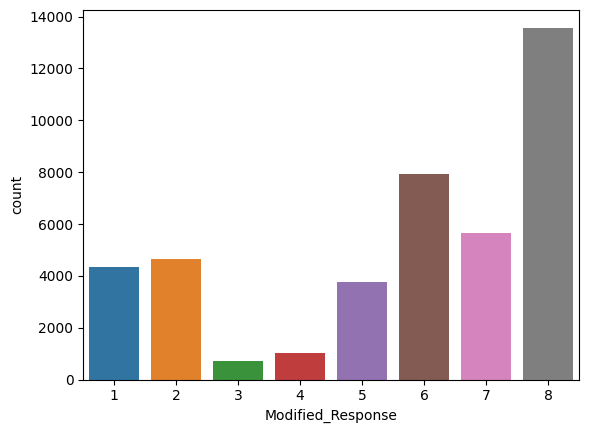

In [3]:
insurance_df = pd.read_csv('../data/life-insurance-assessment-dataset/self_train.csv', index_col='Id')
insurance_df.head()

print(insurance_df)

#Combining the Categores to 3 categories
insurance_df['Modified_Response']  = insurance_df['Response']
sns.countplot(x= insurance_df['Modified_Response']);
# Dropping old response columns
insurance_df.drop('Response',axis = 1, inplace=True)

# Making lists with categorical and numerical features.
categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype =='object']

numerical = categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype !='object']

In [12]:
insurance_df_test = pd.read_csv('../data/life-insurance-assessment-dataset/self_test_wo_response.csv', index_col='Id')


insurance_df_test['Modified_Response'] = np.zeros(insurance_df_test.shape[0])


whole_df = pd.concat([insurance_df, insurance_df_test], ignore_index=True, sort=False)

whole_df.head()
print(insurance_df.shape)
print(insurance_df_test.shape)
print(whole_df.shape)

(41566, 127)
(17815, 127)
(59381, 127)


#### Taking care of missing data

In [13]:
#checking percentage of missing values in a column
missing_val_count_by_column = whole_df.isnull().sum()/len(whole_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

# Dropping all columns in which
whole_df.drop(missing_val_count_by_column[missing_val_count_by_column > 0.4].index, axis=1, inplace=True)

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [14]:
insurance_df = whole_df.iloc[0:insurance_df.shape[0]]
insurance_df_test = whole_df.iloc[insurance_df.shape[0]:whole_df.shape[0]]

print(whole_df.shape)
print(insurance_df.shape)
print(insurance_df_test.shape)

(59381, 119)
(41566, 119)
(17815, 119)


In [17]:
# Data for all the independent variables
X = insurance_df.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
Y = insurance_df['Modified_Response']

# Filling remaining missing values with mean
X = X.fillna(X.mean())

X_TEST = insurance_df_test.drop(labels='Modified_Response',axis=1)
X_TEST = X_TEST.fillna(X_TEST.mean())

C:\Users\himanshu pegu\AppData\Local\Temp\ipykernel_15560\3033450412.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = X.fillna(X.mean())
C:\Users\himanshu pegu\AppData\Local\Temp\ipykernel_15560\3033450412.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_TEST = X_TEST.fillna(X_TEST.mean())


#### Splitting the dataset into the Training set and Test set

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(31174, 118) (31174,)
(10392, 118) (10392,)
